# Figure 7: Spectrum difference between FFT, classic MUSIC, and Spectra-MUSIC.

In [1]:
from utils import *

# Plotting style
color_map = sns.color_palette("cubehelix", 3).as_hex()
hatch_map = ['', '/', '//']
sns.set_theme(style="whitegrid")
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.size'] = 20

In [2]:
filename = "./Data/fig7/9000-9750-450-100-0-3-1.csv"

data = np.array(parse_csv_file(filename))
timestamp = data[:, 0]
amplitude = data[:, 1] * 1.0
amplitude -= np.mean(amplitude)
fs = len(timestamp) / (timestamp[-1] - timestamp[0]) # timestamps in 1us
print(f"Sampling frequency: {fs} Hz")

start_freq, stop_freq, cd_time, dwells, angle, _, _ = parse_bin_name(filename)
expected_period = (cd_time + dwells) * 1e-6

gt_freqs = default_theory_freq(filename)

X, segment_indices = crop_signal(amplitude, fs, expected_period, num_segments = None, crop_factor = 6, plot = False, window_length = 5)
_, classic_music_spectrum = detect_frequency_classic_music(X, fs, plot = False, signal_count = 3)
_, spectra_music_spectrum = detect_frequency(X, fs, plot = False, signal_count = 3)

freq, fft_spectrum = zoom_fft(X[:, 5] * signal.windows.kaiser(X.shape[0], beta = 5), fs, l_freq, r_freq, nfft)
freq /= 1000

Sampling frequency: 200100.4520341537 Hz


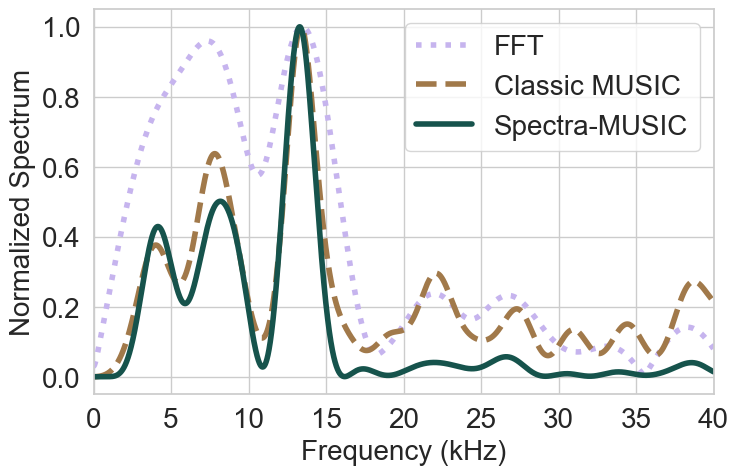

In [3]:
def normalize(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

linewidth = 4
matplotlib.rcParams.update({'font.size': 20})

plt.figure(figsize = (8, 5))
plt.plot(freq, normalize(np.abs(fft_spectrum)), linewidth = linewidth, linestyle = ':', color = color_map[2], label = "FFT")
plt.plot(freq, normalize(classic_music_spectrum), linewidth = linewidth, linestyle = '--', color = color_map[1], label = "Classic MUSIC")
plt.plot(freq, normalize(spectra_music_spectrum), linewidth = linewidth, linestyle = '-', color = color_map[0], label = "Spectra-MUSIC")
plt.xlabel("Frequency (kHz)", fontsize = 20)
plt.ylabel("Normalized Spectrum", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlim([0, 40])
plt.legend(fontsize = 20)